In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import statistics

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving DatasetEmployee1.csv to DatasetEmployee1.csv


In [ ]:
import io
dfEmp = pd.read_csv(io.BytesIO(uploaded['DatasetEmployee1.csv']))
print(dfEmp.head())

   Emp ID  satisfaction_level  ...   dept  salary
0    2001                0.58  ...  sales     low
1    2002                0.82  ...  sales     low
2    2003                0.45  ...  sales     low
3    2004                0.78  ...  sales     low
4    2005                0.49  ...  sales     low

[5 rows x 10 columns]


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving DatasetEmployee2.csv to DatasetEmployee2.csv


In [ ]:
import io
dfLeft = pd.read_csv(io.BytesIO(uploaded['DatasetEmployee2.csv']))
print(dfLeft.head())
print(dfLeft.dtypes)

   Emp ID  satisfaction_level  ...   dept  salary
0       1                0.38  ...  sales     low
1       2                0.80  ...  sales  medium
2       3                0.11  ...  sales  medium
3       4                0.72  ...  sales     low
4       5                0.37  ...  sales     low

[5 rows x 10 columns]
Emp ID                     int64
satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
promotion_last_5years      int64
dept                      object
salary                    object
dtype: object


In [ ]:
# salary count
print(dfEmp.salary.value_counts())
print(dfLeft.salary.value_counts())

low       5144
medium    5129
high      1155
Name: salary, dtype: int64
low       2172
medium    1317
high        82
Name: salary, dtype: int64


In [ ]:
# promotion count
print(dfEmp.promotion_last_5years.value_counts())
print(dfLeft.promotion_last_5years.value_counts())

0    11128
1      300
Name: promotion_last_5years, dtype: int64
0    3552
1      19
Name: promotion_last_5years, dtype: int64


In [ ]:
# work accident count
print(dfEmp.Work_accident.value_counts())
print(dfLeft.Work_accident.value_counts())

0    9428
1    2000
Name: Work_accident, dtype: int64
0    3402
1     169
Name: Work_accident, dtype: int64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

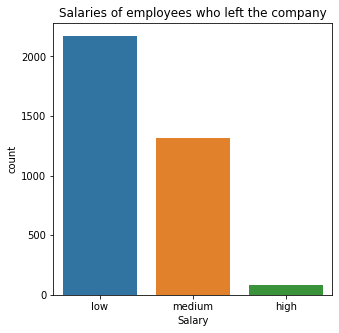

In [ ]:
#salary plot of the employees who left the company
plt.figure(figsize=(5,5))
sns.countplot(dfLeft['salary'])
plt.title('Salaries of employees who left the company')
plt.xlabel('Salary')
plt.savefig('Sal-Left.png')
files.download('Sal-Left.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

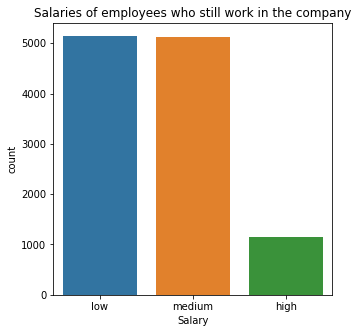

In [ ]:
#salary plot of the employees who left the company
plt.figure(figsize=(5,5))
sns.countplot(dfEmp['salary'])
plt.title('Salaries of employees who still work in the company')
plt.xlabel('Salary')
plt.savefig('Sal-Work.png')
files.download('Sal-Work.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

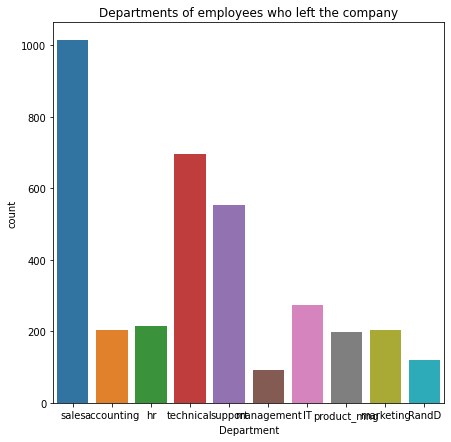

In [ ]:
#department plot for the employees who left the company
plt.figure(figsize=(7,7))
sns.countplot(dfLeft['dept'])
plt.title('Departments of employees who left the company')
plt.xlabel('Department')
plt.savefig('dept-Left.png')
files.download('dept-Left.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

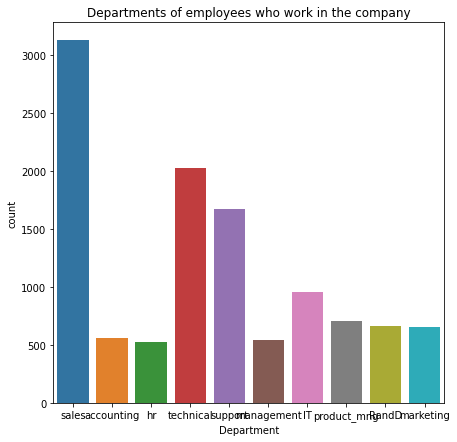

In [ ]:
#department plot for the employees who left the company
plt.figure(figsize=(7,7))
sns.countplot(dfEmp['dept'])
plt.title('Departments of employees who work in the company')
plt.xlabel('Department')
plt.savefig('dept-Work.png')
files.download('dept-Work.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

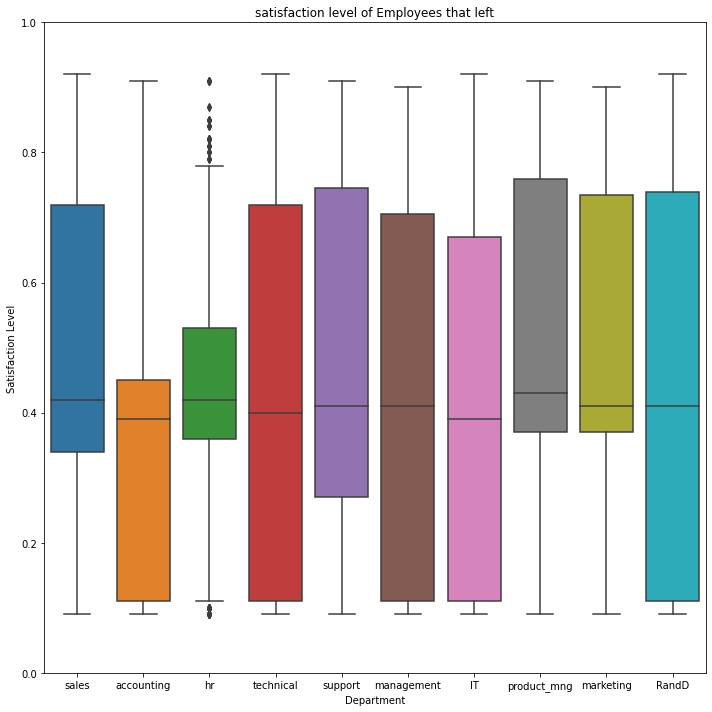

In [ ]:
#satisfaction level 
plt.figure(figsize=(10,10))
sns.boxplot(x='dept', y='satisfaction_level', data=dfLeft)
plt.ylim([0,1])
plt.title('satisfaction level of Employees that left')
plt.xlabel('Department')
plt.ylabel('Satisfaction Level')
plt.tight_layout()
plt.savefig('Satisfaction-Left.png')
files.download('Satisfaction-Left.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

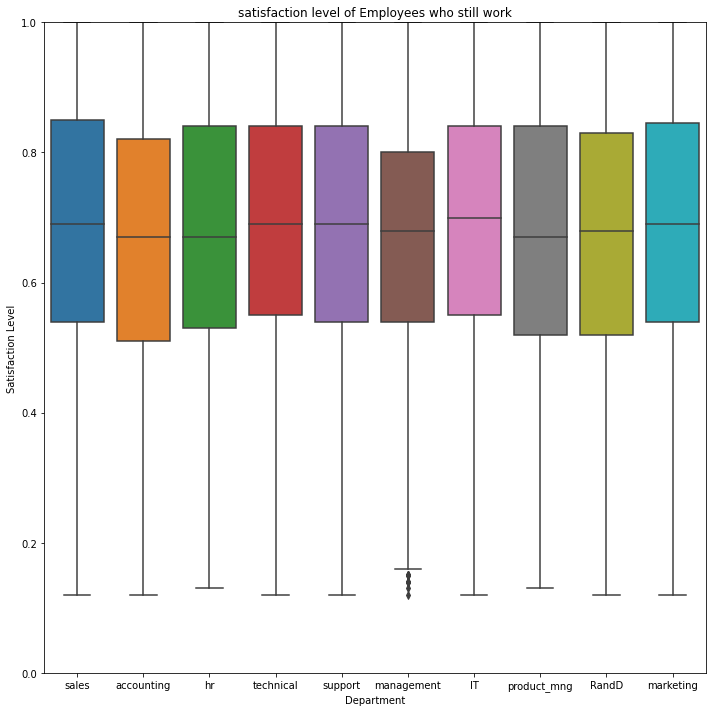

In [ ]:
#satisfaction level 
plt.figure(figsize=(10,10))
sns.boxplot(x='dept', y='satisfaction_level', data=dfEmp)
plt.ylim([0,1])
plt.title('satisfaction level of Employees who still work')
plt.xlabel('Department')
plt.ylabel('Satisfaction Level')
plt.tight_layout()
plt.savefig('Satisfaction-Work.png')
files.download('Satisfaction-Work.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

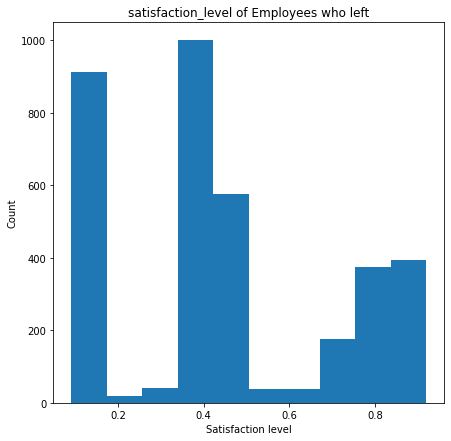

In [ ]:
plt.figure(figsize=(7,7))
plt.hist(dfLeft['satisfaction_level'])
plt.title('satisfaction_level of Employees who left')
plt.xlabel('Satisfaction level')
plt.ylabel('Count')
plt.savefig('SatLevelLeft.png')
files.download('SatLevelLeft.png')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

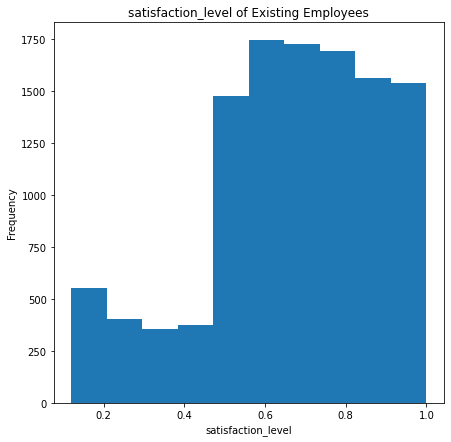

In [ ]:
plt.figure(figsize=(7,7))
plt.hist(dfEmp['satisfaction_level'])
plt.title('satisfaction_level of Existing Employees')
plt.xlabel('satisfaction_level')
plt.ylabel('Frequency')
plt.savefig('SatLevelWorking.png')
files.download('SatLevelWorking.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

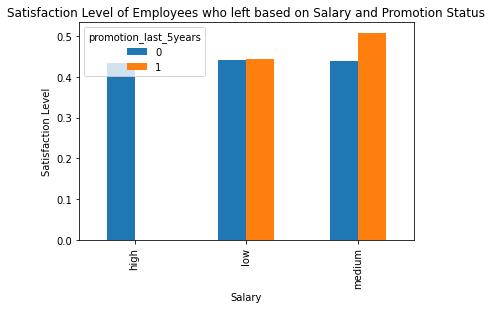

In [ ]:
#"Satisfaction Level - Employees who left (Salary and Promotion)"
EL_PRO =dfLeft.pivot_table(index='salary',columns='promotion_last_5years',values='satisfaction_level')
EL_PRO.plot.bar()
plt.title("Satisfaction Level - Employees who left (Salary and Promotion)")
plt.xlabel("Salary")
plt.ylabel("Satisfaction Level")
plt.savefig('SatLevelEmp.png')
files.download('SatLevelEmp.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

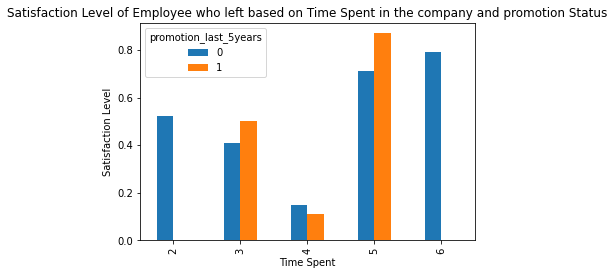

In [ ]:
#Satisfaction Level of Employee who left based on Time Spent in the company and promotion Status
EL_PRO =dfLeft.pivot_table(index='time_spend_company',columns='promotion_last_5years',values='satisfaction_level')
EL_PRO.plot.bar()
plt.title("Satisfaction Level of Employee who left based on Time Spent in the company and promotion Status")
plt.xlabel("Time Spent")
plt.ylabel("Satisfaction Level")
plt.savefig('Time_And_Sat.png')
files.download('Time_And_Sat.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

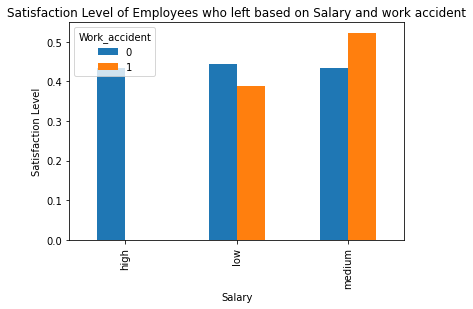

In [ ]:
#Satisfaction Level of Employees who left based on Salary and work accident
EL_PRO =dfLeft.pivot_table(index='salary',columns='Work_accident',values='satisfaction_level')
EL_PRO.plot.bar()
plt.title("Satisfaction Level of Employees who left based on Salary and work accident")
plt.xlabel("Salary")
plt.ylabel("Satisfaction Level")
plt.savefig('Sal_Workaccident.png')
files.download('Sal_Workaccident.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

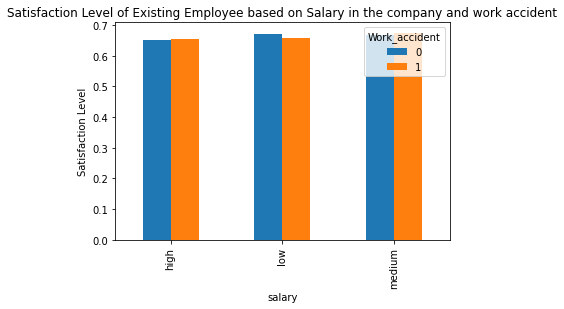

In [ ]:
#Satisfaction Level of Existing Employee based on Salary in the company and work accident
Existing_Employee_sat =dfEmp.pivot_table(index='salary',columns='Work_accident',values='satisfaction_level')
Existing_Employee_sat.plot.bar()
plt.title("Satisfaction Level of Existing Employee based on Salary in the company and work accident")
plt.xlabel("salary")
plt.ylabel("Satisfaction Level")
plt.savefig('Exist_Sal_Workaccident.png')
files.download('Exist_Sal_Workaccident.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

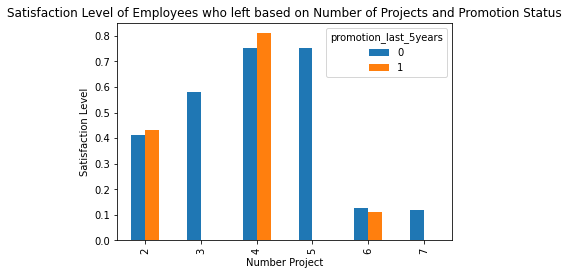

In [ ]:
#Satisfaction Level of Employees who left based on Number of Projects and Promotion Status
EL_PRO =dfLeft.pivot_table(index='number_project',columns='promotion_last_5years',values='satisfaction_level')
EL_PRO.plot.bar()
plt.title("Satisfaction Level of Employees who left based on Number of Projects and Promotion Status")
plt.xlabel("Number Project")
plt.ylabel("Satisfaction Level")
plt.savefig('Left_Num_Prom.png')
files.download('Left_Num_Prom.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

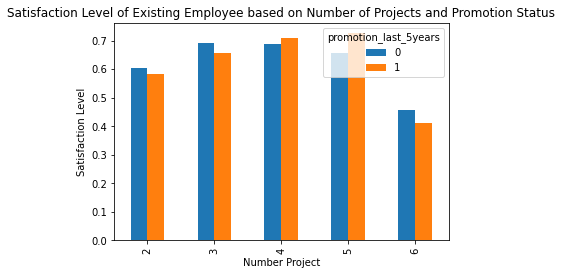

In [ ]:
#Satisfaction Level of Existing Employee based on Number of Projects and Promotion Status
Existing_Employee_project =dfEmp.pivot_table(index='number_project',columns='promotion_last_5years',values='satisfaction_level')
Existing_Employee_project.plot.bar()
plt.title("Satisfaction Level of Existing Employee based on Number of Projects and Promotion Status")
plt.xlabel("Number Project")
plt.ylabel("Satisfaction Level")
plt.savefig('Exist_Num_Promotion.png')
files.download('Exist_Num_Promotion.png')

In [ ]:
# considering the dataframe  of the employees who left the company - dfLeft
dfLeft.describe()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
count,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000
mean,6500.439653,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321
std,6266.484705,0.263933,0.197673,1.818165,61.202825,0.977698,0.212364,0.072759
min,1.000000,0.090000,0.450000,2.000000,126.000000,2.000000,0.000000,0.000000
25%,893.500000,0.130000,0.520000,2.000000,146.000000,3.000000,0.000000,0.000000
50%,1786.000000,0.410000,0.790000,4.000000,224.000000,4.000000,0.000000,0.000000
75%,12678.500000,0.730000,0.900000,6.000000,262.000000,5.000000,0.000000,0.000000
max,14999.000000,0.920000,1.000000,7.000000,310.000000,6.000000,1.000000,1.000000


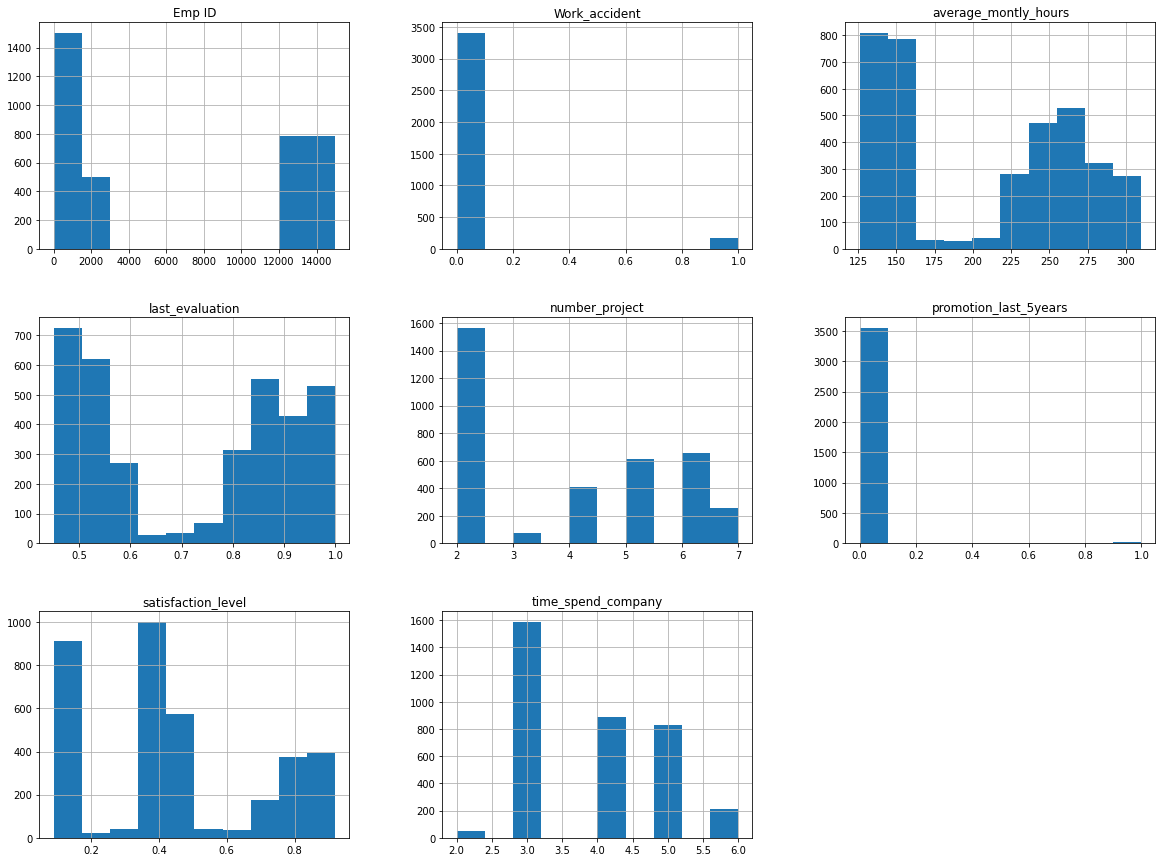

In [ ]:
#creating histogram plots for the attributes in the dataframe

num_bins = 10

dfLeft.hist(bins=num_bins, figsize=(20,15))
plt.savefig("hr_histogram_plots")
plt.show()

In [ ]:
# create dummy variables for the categorical variables 
# there are two categorical variables in the dfLeft dataframe - namely (department, salary)

dummy_vars=['dept','salary']
for var in dummy_vars:
    dummy_list='var'+'_'+var
    dummy_list = pd.get_dummies(dfLeft[var], prefix=var)
    hr1=dfLeft.join(dummy_list)
    dfLeft=hr1

In [ ]:
#The actual categorical variable needs to be removed once the dummy variables have been created.

dfLeft.drop(dfLeft.columns[[8, 9]], axis=1, inplace=True)

In [ ]:
vars=dfLeft.columns.values.tolist()
y=['left']
X=[i for i in vars if i not in y]
X

['Emp ID',
 'satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'promotion_last_5years',
 'dept',
 'salary',
 'dept_IT',
 'dept_RandD',
 'dept_accounting',
 'dept_hr',
 'dept_management',
 'dept_marketing',
 'dept_product_mng',
 'dept_sales',
 'dept_support',
 'dept_technical',
 'salary_high',
 'salary_low',
 'salary_medium']

In [ ]:
# IMPLEMENTING LOGISTIC REGRESSION MODEL
from sklearn.linear_model import LogisticRegression

cols=['satisfaction_level',  'time_spend_company', 'Work_accident', 'promotion_last_5years', 
      'dept_RandD', 'dept_hr', 'dept_management', 'salary_high', 'salary_low'] 
X=dfLeft[cols]

cols_check = ['number_project']
y = dfLeft[cols_check]

In [ ]:

# split the data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=0)

#building the model
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
from sklearn.metrics import accuracy_score
print('Logistic regression accuracy: {:.3f}'.format(accuracy_score(y_test, logreg.predict(X_test))))

Logistic regression accuracy: 0.751


In [ ]:
#Random forest 


from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
print('Random Forest Accuracy: {:.3f}'.format(accuracy_score(y_test, rf.predict(X_test))))

Random Forest Accuracy: 0.768


In [ ]:
# support vector machine model

from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
print('Support vector machine accuracy: {:.3f}'.format(accuracy_score(y_test, svc.predict(X_test))))

Support vector machine accuracy: 0.751


In [ ]:
#Random forest shows comparatively high accuracy

#10 fold cross validation 
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = RandomForestClassifier()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.2f" % (results.mean()))


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array

10-fold cross validation average accuracy: 0.77


In [ ]:
#precision
from sklearn.metrics import classification_report
print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

           2       0.98      0.98      0.98      1100
           3       0.35      0.33      0.34        46
           4       0.53      0.43      0.48       308
           5       0.61      0.66      0.63       423
           6       0.67      0.88      0.76       439
           7       0.36      0.12      0.19       184

    accuracy                           0.77      2500
   macro avg       0.58      0.57      0.56      2500
weighted avg       0.75      0.77      0.75      2500

